# Calibrating a Camera

Code based on "Calibrating your Camera" classroom.

In [1]:
#Some imports

import glob
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

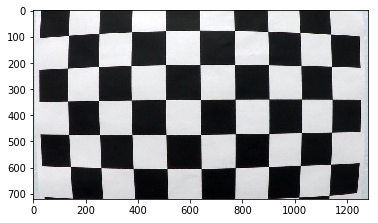

In [2]:
#We will read the calibration images of the chessboard taked at different angles
#and distancies. 8x6 corners.

#Reading the first image
calibration_images_path = "./camera_cal/"

orig = cv2.imread(calibration_images_path + 'calibration1.jpg')
img_shape = orig.shape

plt.imshow(orig)

In [3]:
#Read in and make a list of calibration images
images = glob.glob(calibration_images_path + 'calibration*.jpg')

#Arrays to store object points and image points from all the images
objpoints = [] #3d points in real world space
imgpoints = [] #2d points in image plane

#Prepare object points, like (0,0,0), (1,0,0), (2,0,0)... (7,5,0)
#Z will always be 0 cause the image is on a flat plane
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) #x, y coordinates

#Original images
orig_images = []
#Images with chessboard corners 
corn_images = []
#Images with no chessboard corners detected
no_corn_images = []
#Calibrated images
calib_images = []

corn_images_index = []
no_corn_images_index = []
img_index = 0

for fname in images:
    img = cv2.imread(fname)
    orig_images.append(img.copy())
    
    #Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    #If corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        corn_images.append(img)
        corn_images_index.append(img_index)
    else:
        no_corn_images.append(img)
        no_corn_images_index.append(img_index)
    
    img_index += 1
        
print("We found {} images with corners".format(len(corn_images)))
print("We have {} images in total.".format(len(orig_images)))

print("Id of images with detected corners: ", corn_images_index)
print("Id of images with no detected corners: ", no_corn_images_index)

We found 17 images with corners
We have 20 images in total.
Id of images with detected corners:  [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]
Id of images with no detected corners:  [2, 4, 12]


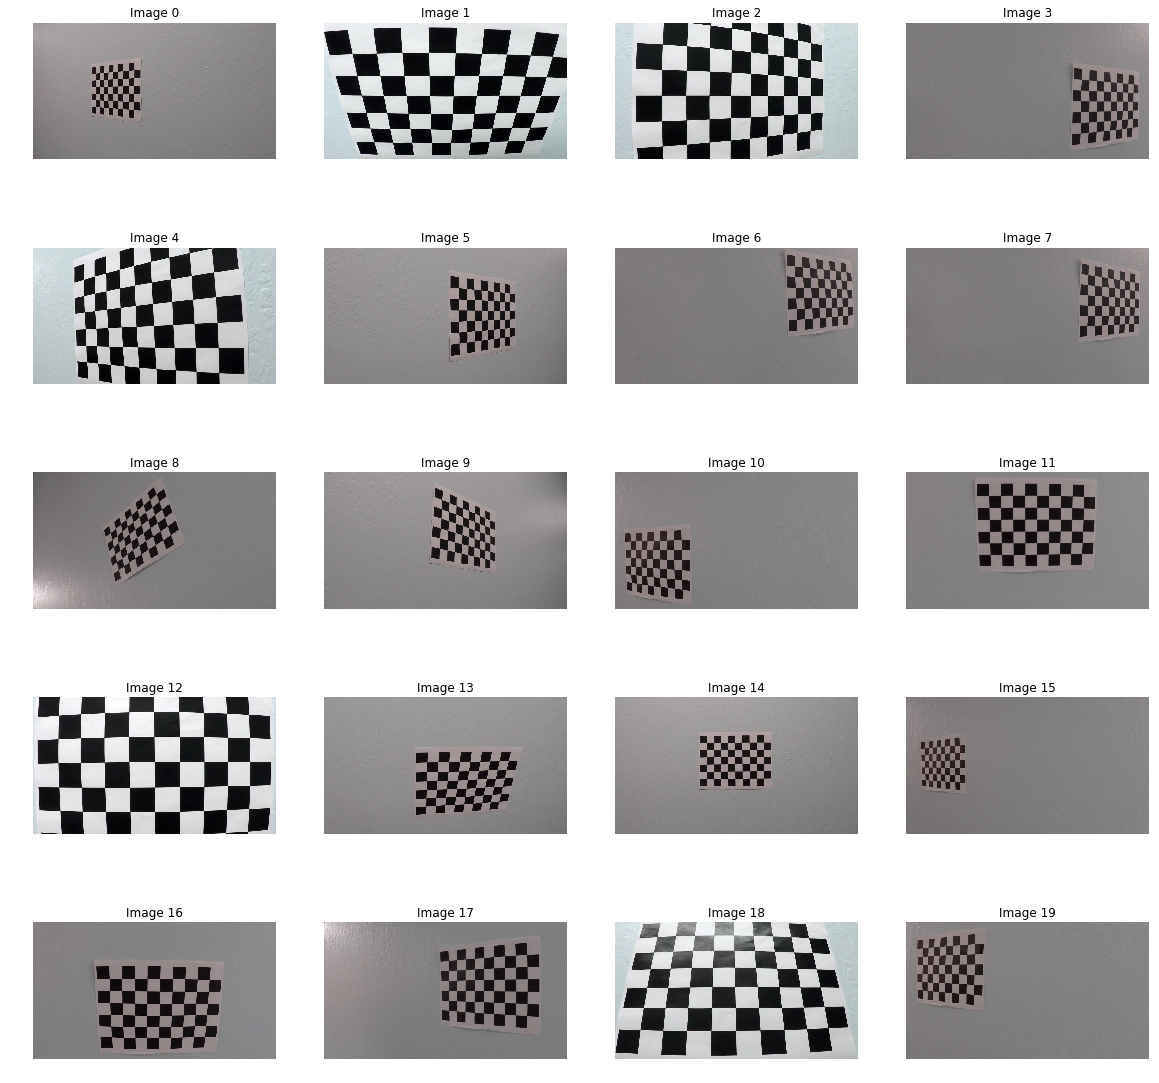

In [4]:
#Plot original images
figure_orig = plt.figure(figsize= (20, 20))
for i in range(len(orig_images)):
    figure_orig.add_subplot(5, 4, i+1)
    plt.title("Image {}".format(i))
    plt.imshow(orig_images[i])
    plt.axis('off')
    
plt.show()

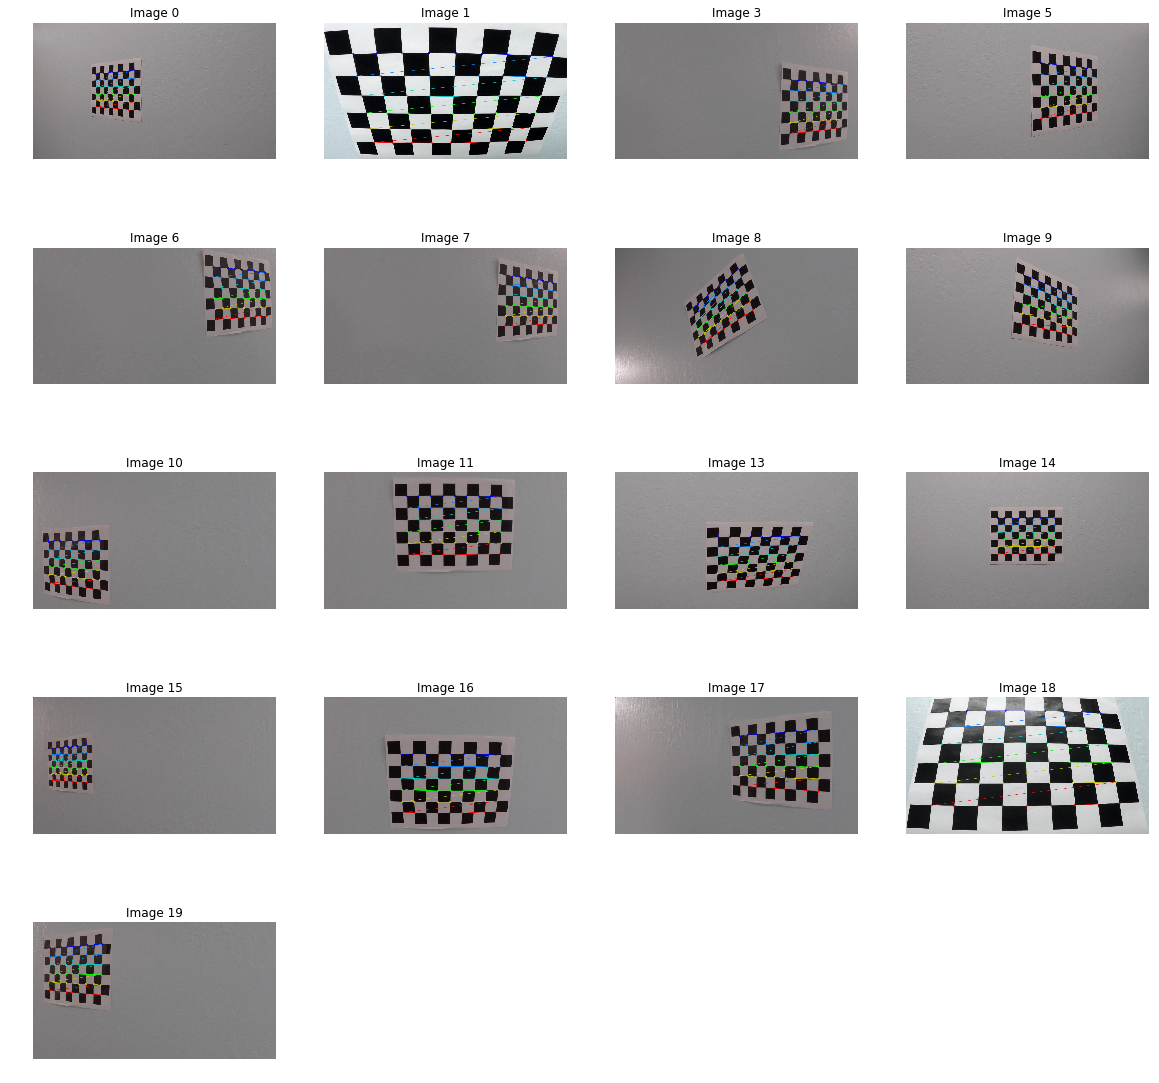

In [5]:
#Plot images with corners
figure_corners = plt.figure(figsize= (20, 20))
for i in range(len(corn_images)):
    figure_corners.add_subplot(5, 4, i+1)
    plt.title("Image {}".format(corn_images_index[i]))
    plt.imshow(corn_images[i])
    plt.axis('off')
    
plt.show()


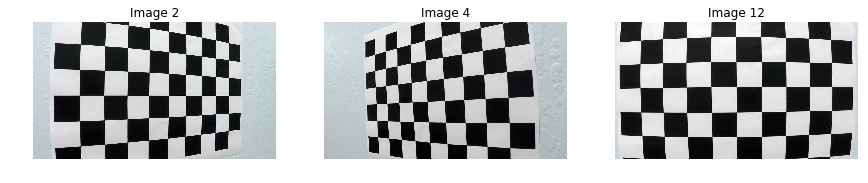

In [6]:
#Plot images with no corners
figure_no_corners = plt.figure(figsize= (20, 20))
for i in range(len(no_corn_images)):
    figure_no_corners.add_subplot(5, 4, i+1)
    plt.title("Image {}".format(no_corn_images_index[i]))
    plt.imshow(no_corn_images[i])
    plt.axis('off')
    
plt.show()

In [7]:
#CalibrateCamera OpenCv function. Returns the translation and rotation vectors (rvecs, tvecs) 
#of the camera in real world at the same time as the distortion coefficients (dist)
#and camera matrix (mtx)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape[0:2], None, None)

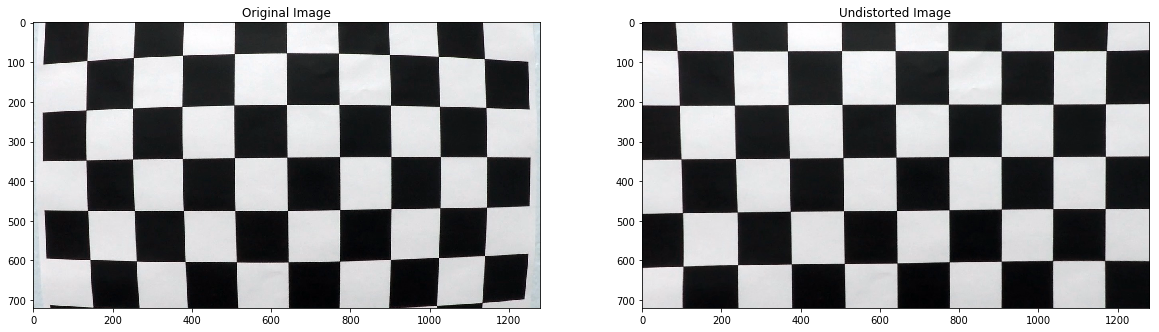

In [8]:
#Show calibration results
undist = cv2.undistort(orig, mtx, dist, None, mtx)

figure_result1 = plt.figure(figsize=(20,20))
figure_result1.add_subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(orig)
figure_result1.add_subplot(1, 2, 2)
plt.title("Undistorted Image")
plt.imshow(undist)
plt.show()

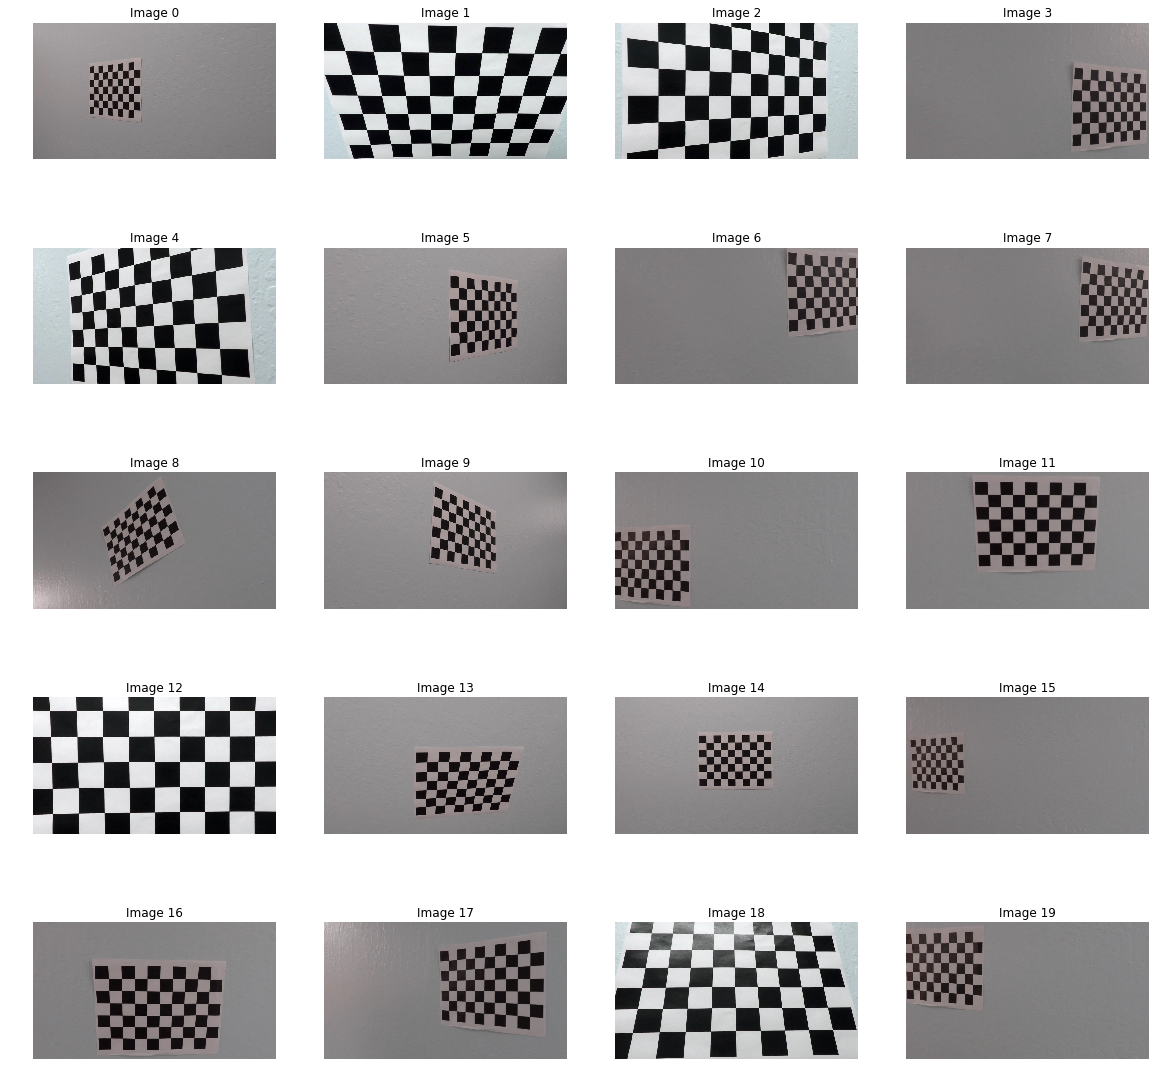

In [9]:
#Undistort all images

for image in orig_images:
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    calib_images.append(undist)
    
#Print all images
figure_result2 = plt.figure(figsize= (20, 20))
for i in range(len(calib_images)):
    figure_result2.add_subplot(5, 4, i+1)
    plt.title("Image {}".format(i))
    plt.imshow(calib_images[i])
    plt.axis('off')
    
plt.show()

In [10]:
#Saving the distortion coefficients (dist) and the camera matrix (mtx)
#we need to transorm 3D object points to 2D image points. 
calib_param = {}
calib_param["mtx"] = mtx
calib_param["dist"] = dist
pickle.dump(calib_param, open('./data/camera_calibration_params.p', 'wb'))